In [18]:
import json
import numpy as np

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from math import sqrt
from pathlib import Path

In [14]:
gt_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
    "S03/c010/gt_coco"
)

In [15]:
noisy_frames = [
    [x for x in range(1144, 1170)] +
    [x for x in range(1193, 1216)] +
    [x for x in range(1710, 2142)]
]

non_noisy_frames = [x for x in range(535, 2142) if x not in noisy_frames]

In [64]:
out_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
    "S03/c010/w2predictions_t1_redone"
)

ap50 = np.zeros(10)
reclarge = np.zeros(10)
alpha = [0.5 * x for x in range(1, 11)]

for prediction_file in out_path.glob("*.json"):
    print(str(prediction_file))
    alpha_index = int(prediction_file.parts[-1].split('.')[0][-1])
    print(alpha_index)

    coco = COCO(str(gt_path / "gt_moving_onelabel_test.json"))

    with open(prediction_file, 'r') as f_pred:
        prediction = json.load(f_pred)

    img_ids = set()
    max_area = {}

    for x in prediction:
        img_ids.add(x["image_id"])
        if x["image_id"] in max_area.keys():
            max_area[x["image_id"]] = max(
                max_area[x["image_id"]],
                x["bbox"][-1] * x["bbox"][-2],
            )
        else:
            max_area[x["image_id"]] = x["bbox"][-1] * x["bbox"][-2]

    sorted_prediction = []
    for x in prediction:
        sorted_prediction.append({
            "image_id": x["image_id"],
            "category_id": x["category_id"],
            "bbox": x["bbox"],
            "score": sqrt((x["bbox"][-1] * x["bbox"][-2]) / max_area[x["image_id"]])
        })

    cocodt = coco.loadRes(sorted_prediction)
    cocoeval = COCOeval(coco, cocodt, 'bbox')
    # cocoeval.params.imgIds = non_noisy_frames

    cocoeval.evaluate()
    cocoeval.accumulate()
    cocoeval.summarize()

    # print(cocoeval.evalImgs[0])
    AP,  AP50, AP75,  APsmall, APmed, APlarge,\
    AR1, AR10, AR100, ARsmall, ARmed, ARlarge = cocoeval.stats

    ap50[alpha_index] = AP50
    reclarge[alpha_index] = ARlarge

best_ours_ap = np.max(ap50)
best_ours_rec = np.max(reclarge)
best_ours_ind = np.argmax(ap50)

/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/S03/c010/w2predictions_t1_redone/prediction_5.json
5
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.56s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall   

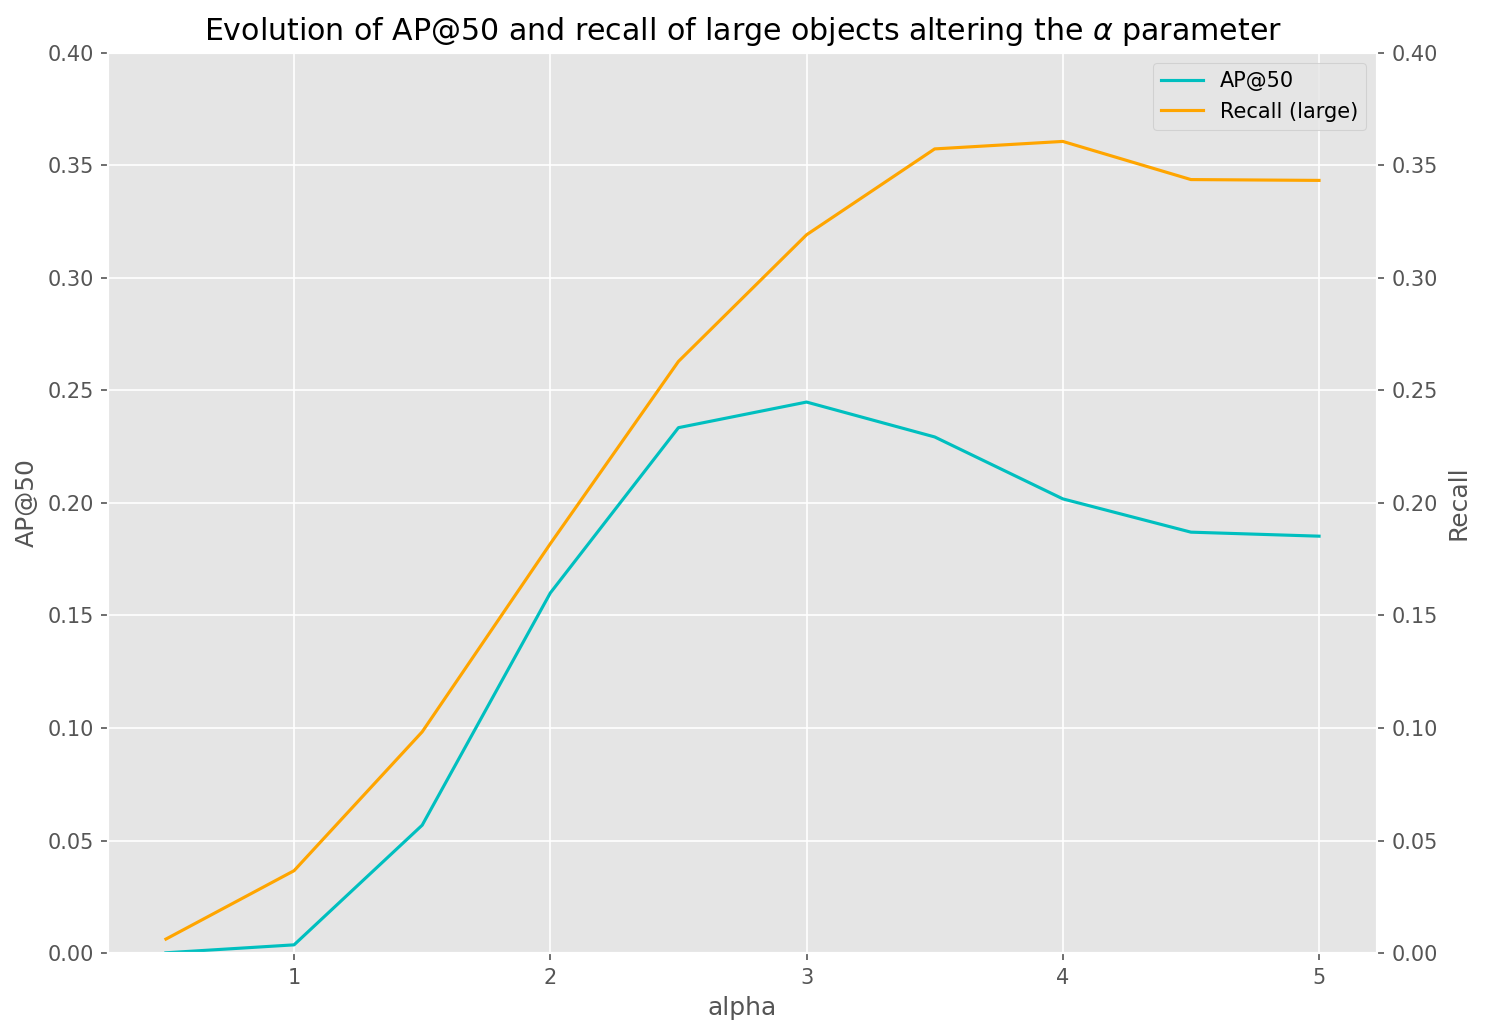

In [66]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 7))
plt.style.use('ggplot')
plt.title("Evolution of AP@50 and recall of large objects altering the $\\alpha$ parameter")
plt.xlabel("alpha")

ax1 = plt.subplot()
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.4])
ax1.set_ylim([0, 0.4])
ax2.grid(False)

l1, = ax1.plot(alpha, ap50, color='c')
ax1.set_ylabel("AP@50")

l2, = ax2.plot(alpha, reclarge, color="orange")
ax2.set_ylabel("Recall")


plt.legend([l1, l2], ["AP@50", "Recall (large)"])
plt.tight_layout()
plt.savefig("./plots/t12_ap_vs_alpha.png")
plt.show()
plt.close()

In [67]:
out_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
    "S03/c010/w2predictions_t3"
)

ap50 = np.zeros(5)
reclarge = np.zeros(5)
names = ["MoG2", "KNN", "LBSP", "MoG", "Ours (Non-adaptive)"]

for prediction_file in out_path.glob("*.json"):
    print(str(prediction_file))
    alpha_index = int(prediction_file.parts[-1].split('.')[0][-1])
    print(alpha_index)

    coco = COCO(str(gt_path / "gt_moving_onelabel_test.json"))

    with open(prediction_file, 'r') as f_pred:
        prediction = json.load(f_pred)

    img_ids = set()
    max_area = {}

    for x in prediction:
        img_ids.add(x["image_id"])
        if x["image_id"] in max_area.keys():
            max_area[x["image_id"]] = max(
                max_area[x["image_id"]],
                x["bbox"][-1] * x["bbox"][-2],
            )
        else:
            max_area[x["image_id"]] = x["bbox"][-1] * x["bbox"][-2]

    sorted_prediction = []
    for x in prediction:
        sorted_prediction.append({
            "image_id": x["image_id"],
            "category_id": x["category_id"],
            "bbox": x["bbox"],
            "score": sqrt((x["bbox"][-1] * x["bbox"][-2]) / max_area[x["image_id"]])
        })

    cocodt = coco.loadRes(sorted_prediction)
    cocoeval = COCOeval(coco, cocodt, 'bbox')
    # cocoeval.params.imgIds = non_noisy_frames

    cocoeval.evaluate()
    cocoeval.accumulate()
    cocoeval.summarize()

    # print(cocoeval.evalImgs[0])
    AP,  AP50, AP75,  APsmall, APmed, APlarge, \
    AR1, AR10, AR100, ARsmall, ARmed, ARlarge = cocoeval.stats

    ap50[alpha_index] = AP50
    reclarge[alpha_index] = ARlarge

ap50[4] = best_ours_ap
reclarge[4] = best_ours_rec

/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/S03/c010/w2predictions_t3/prediction_SOTA_0.json
0
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.17s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.60s).
Accumulating evaluation results...
DONE (t=0.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.189
 Average Recall     

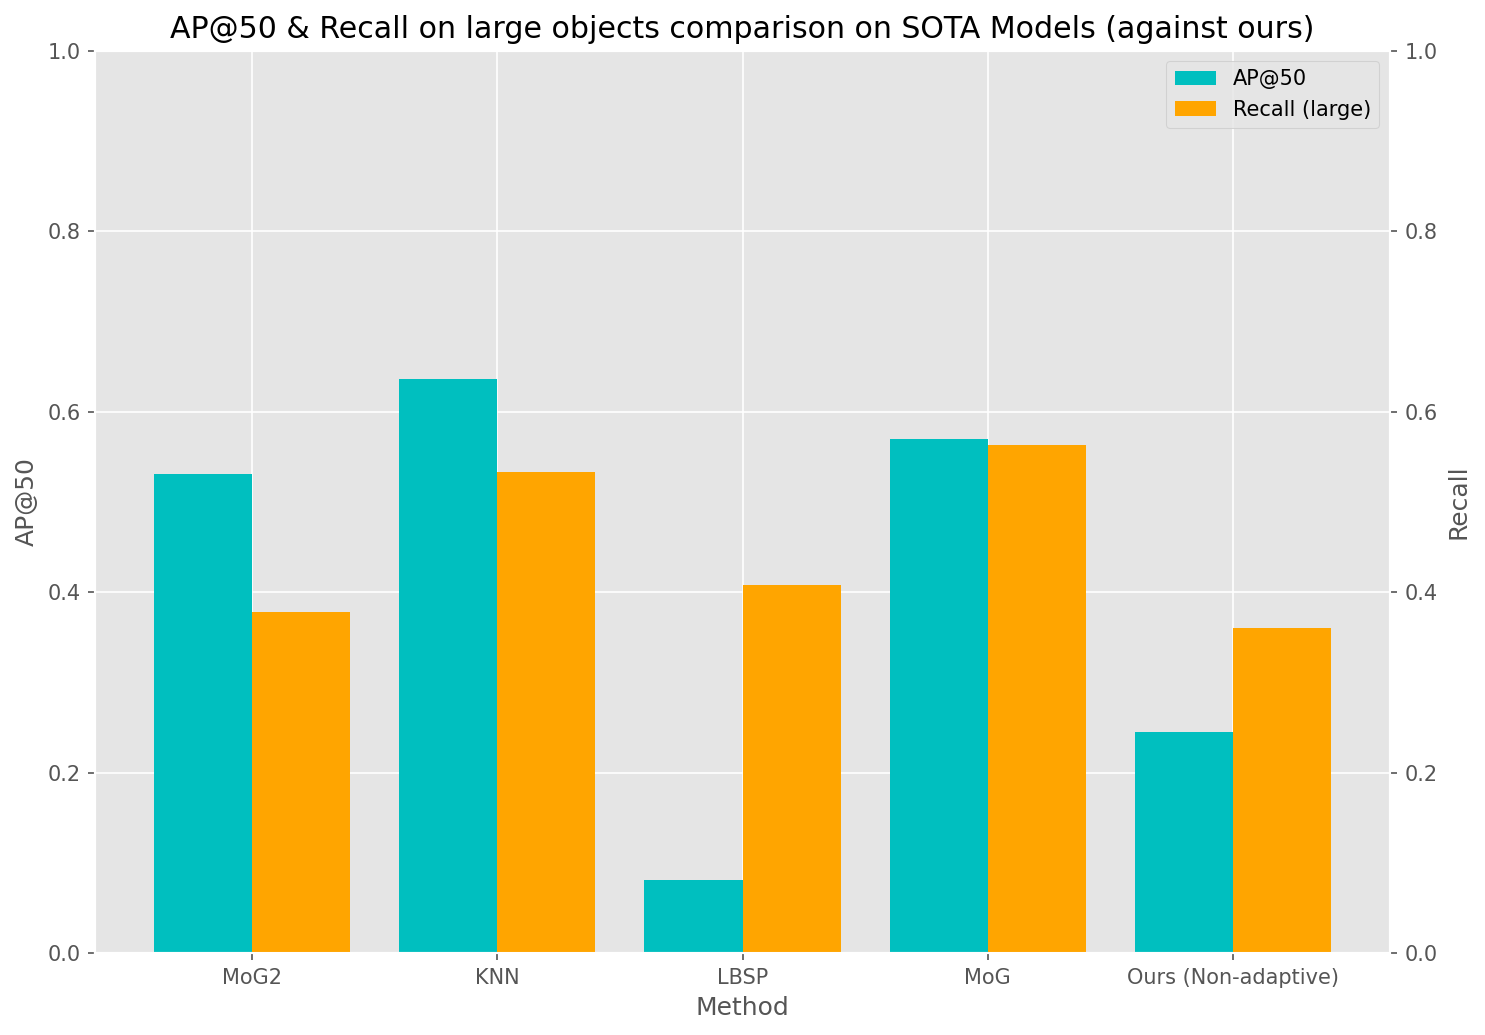

In [97]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 7))
plt.style.use('ggplot')
plt.title("AP@50 & Recall on large objects comparison on SOTA Models (against ours)")
plt.xlabel("Method")

pos_x = np.arange(5)
pos_ap_x = pos_x - 0.2
pos_re_x = pos_x + 0.2

ax1 = plt.subplot()
ax2 = ax1.twinx()
ax2.grid(False)

l1 = ax1.bar(x=pos_ap_x, height=ap50, width=0.4,color='c')
ax1.set_ylabel("AP@50")
ax1.set_ylim([0, 1.0])

l2 = ax2.bar(x=pos_re_x, height=reclarge, width=0.4, color="orange")
ax2.set_ylabel("Recall")
ax2.set_ylim([0, 1.0])
ax1.set_xticks(pos_x, labels=names)


plt.legend([l1, l2], ["AP@50", "Recall (large)"])
plt.tight_layout()
plt.savefig("./plots/t31_comparison.png")
plt.show()
plt.close()

In [2]:
from pathlib import Path
from data import FrameLoader
from background_estimation import StillBackgroundEstimatorGrayscale, \
    cleanup_mask, get_bboxes
from viz import draw_bboxes
import cv2

frame_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/"
    "AICity_data/train/S03/c010/vdo_frames"
)
estimator_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
    "S03/c010/estimators"
)
out_path = Path(
    "./plots"
)
gt_path = Path(
    "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
    "S03/c010/gt_coco"
)

test_loader = FrameLoader(frame_path, 0.25, "upper")

estimator = StillBackgroundEstimatorGrayscale(test_loader, tol=0.5)
estimator.load_estimator(estimator_path / "estimator.npz")

tol_values = [0.5 * x for x in range(1, 11)]

img_id, img = test_loader[922 - 535]

for jj, tol in enumerate(tol_values):
    estimator.set_tol(tol)
    mask = estimator.predict(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

    mask = cleanup_mask(mask, 11)
    bboxes = get_bboxes(mask, 400)

    draw_bboxes(mask, bboxes, [], str(out_path / f"t12_img922_alpha{tol}.png"))